# Explore here

In [23]:
import requests
import os

url = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"
folder_path = "data/raw"

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Download the file
response = requests.get(url)
file_path = os.path.join(folder_path, "url_spam.csv") 

with open(file_path, "wb") as f:
    f.write(response.content)

print(f"File downloaded to: {file_path}")

File downloaded to: data/raw/url_spam.csv


In [24]:
import pandas as pd

total_data = pd.read_csv("/workspaces/Spam_Detection_NLP_ProjectDianaM/src/data/raw/url_spam.csv")

total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [25]:
# Factorize categorical data

total_data["is_spam"] = total_data["is_spam"].apply(lambda x: 1 if x else 0).astype(int)
total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [26]:
total_data.shape

(2999, 2)

In [27]:
# Duplicate management

total_data = total_data.drop_duplicates()
total_data = total_data.reset_index(inplace = False, drop = True)
total_data.shape

(2369, 2)

In [28]:
print(f"Spam: {len(total_data.loc[total_data.is_spam == 1])}")
print(f"No spam: {len(total_data.loc[total_data.is_spam == 0])}")

Spam: 244
No spam: 2125


In [29]:
# Processing text

import regex as re

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', " ", text)
    
    return text.split()  # Split into words

total_data["url"] = total_data["url"].apply(preprocess_text)
total_data.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",1
1,"[https, www, hvper, com]",1
2,"[https, briefingday, com, m, v, n, i, f]",1
3,"[https, briefingday, com, n, m, commentform]",0
4,"[https, briefingday, com, fan]",1


In [41]:
# Lematization

from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
        # Keeping words with length 2 or more
    tokens = [word for word in tokens if len(word) > 2]
            # Erase url, www or com
    tokens = [word for word in tokens if word not in "http"]
    tokens = [word for word in tokens if word not in "www"]
    tokens = [word for word in tokens if word not in "com"]
    return tokens

total_data["url"] = total_data["url"].apply(lemmatize_text)
total_data.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",1
1,[hvper],1
2,[briefingday],1
3,"[briefingday, commentform]",0
4,"[briefingday, fan]",1


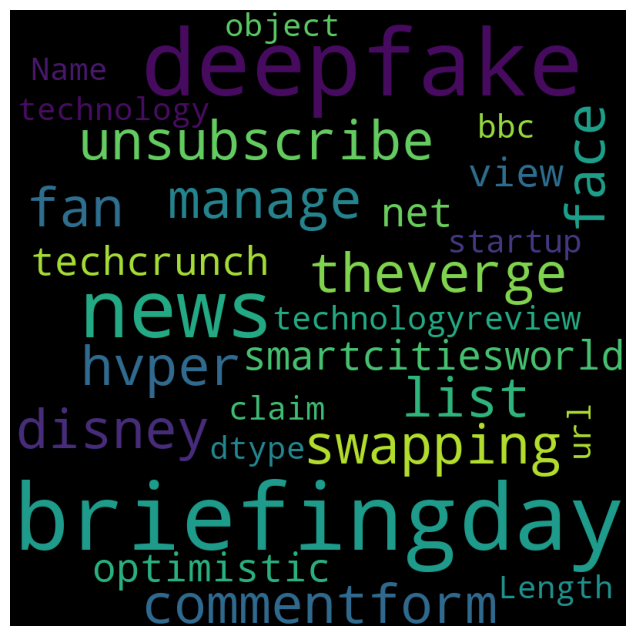

In [42]:
# Plotting word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(total_data["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
# Feature extraction 
# Step 1) Tokenization 

from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = total_data["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]
tokens_list


['briefingday list manage unsubscribe',
 'hvper',
 'briefingday',
 'briefingday commentform',
 'briefingday fan',
 'brookings edu interactives reopening america world',
 'reuters investigates special report health coronavirus britain pub',
 'theatlantic magazine archive supermarket miracle',
 'vox john bolton book excerpt trump ukraine china',
 'theguardian travel jun end tourism coronavirus pandemic travel industry',
 'bbc future article virus disappeared',
 'narratively quarantined hippy trapped jungle paradise',
 'ourworldindata org grapher daily covid case day average',
 'spiked online healthy society doe destroy monument',
 'nytimes interactive business economy container ship built html',
 'aeon essay nostalgia rocket fuel power hope change',
 'youtube watch wcu agyz ref briefingday curator briefingday utm source briefingday utm medium email',
 'popsci story science haribo gummy candy flavor',
 'atlasobscura article coffee',
 'outsideonline john ackerman cave minnesota',
 'nautil 

In [46]:
# Step 2) Vectorization
 
vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 2)
# max_df = maximum frequency of a word for it to be included in the vocabulary
# min_df = minimum number of documents a word must appear in to be included in the vocabulary
X = vectorizer.fit_transform(tokens_list).toarray()
y = total_data["is_spam"]

X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 1929))

In [47]:
# Train / test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Build the Model SVM

from sklearn.svm import SVC

model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [49]:
# Predictions

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
# Evaluation (accuracy)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9641350210970464

In [ ]:
# Model optimization

import numpy as np
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed’"],
    "degree": [1, 2, 3, 4, 5],
    "gamma": ["scale", "auto"]
}

# We initialize the random search
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                    'precomputed’']},
             scoring='accuracy')

In [52]:
# Testing best grid

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
350 fits failed out of a total of 1750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

Best hyperparameters: {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Training and evaluation of the optimized model (based on grid search best hyperparameters)
# The model performs worst probably because of the errors when processing the grid search hyperparameters that should be further analysed:
''' "350 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()" and so on '''

opt_model = SVC(C = 10, degree = 1, gamma = "scale", kernel = "rbf", random_state = 42)
opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9578059071729957

In [ ]:
# Training and evaluation of the optimized model (based on solutions best hyperparameters)

opt_model = SVC(C = 1000, degree = 1, gamma = "auto", kernel = "poly", random_state = 42)
opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9535864978902954

In [60]:
# Saving the best performing model

from pickle import dump

dump(model, open("/workspaces/Spam_Detection_NLP_ProjectDianaM/models/default_svm_classifier_kernel-linear_42.sav", "wb"))

